In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv

# 폰트 관련

In [2]:
import os
from matplotlib import font_manager as fm

font_file = "../fonts/NanumGothic/NanumGothic.ttf"
fm.fontManager.addfont(font_file)

if os.name == 'posix':
    # plt.rcParams['font.family'] = 'NanumGothic'
    plt.rc('font', family='NanumGothic')
elif os.name == 'nt': 
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False)
# plt.rcParams['axes.unicode_minus'] = False

%config InlineBackend.figure_format = 'retina'

# 생활이동 행정동(큰거)

In [3]:
with open("../large-datasets/생활이동_행정동_202209/생활이동_행정동_2022.09_00시.csv", encoding="cp949") as f:
    # data = csv.reader(f)
    data = pd.read_csv(f)
    
    print( data.sort_values(by='평균 이동 시간(분)')[::-1].head(20) )
    # for row in data:
        # print(row)
    
    

           대상연월 요일  도착시간  출발 행정동 코드  도착 행정동 코드 성별  나이 이동유형  평균 이동 시간(분)  \
2301518  202209  금     0    1124080      35000  M  15   EH         3423   
1545305  202209  목     0    1112056    3137031  F  15   WE         1724   
665884   202209  월     0      21000    1109075  F  15   EH         1509   
720924   202209  화     0    1101061      21000  M  15   EH         1450   
1017978  202209  화     0      32000    1124058  F  25   EH         1440   
1020459  202209  화     0      35000    1124065  M  55   EW         1440   
2771401  202209  토     0      21000    1108084  M  50   HE         1439   
412914   202209  일     0      37000    1116069  F  50   EE         1437   
711757   202209  월     0      36000    1105060  F  55   EE         1437   
1016960  202209  화     0      32000    1101071  F  25   EH         1435   
2325030  202209  금     0      25000    1122061  F  60   HE         1433   
544888   202209  월     0    1116052      21000  M  25   EH         1429   
779766   202209  화     0 

# 서울시 버스노선별 정류장별 승하차 인원 정보.csv

         노선번호  표준버스정류장ID                 역명  승차총승객수  하차총승객수      등록일자
243790  동대문01  105900027         회기역(00001)    5619    2688  20221103
319372     01  102000226      남산서울타워(00009)    4692    4795  20221101
459239   금천03  117900140    가산디지털단지역(00001)    3996      42  20221029
381484   양천01  118900067  당산역.지하철2호선(00019)    3698    2872  20221031
372612  서대문03  112900230       신촌전철역(00015)    3658    1773  20221031
...       ...        ...                ...     ...     ...       ...
187255    360  121000011   지하철2호선강남역(00070)    1332     502  20221105
485560   강북02  108900178         수유역(00016)    1326    1097  20221028
211499   702A  111000042    응암역신사오거리(00055)    1325     803  20221104
290540   8772  111000025    구파발역2번출구(00006)    1316       8  20221102
444859    120  108000004    수유역.강북구청(00078)    1310     808  20221029

[100 rows x 6 columns]


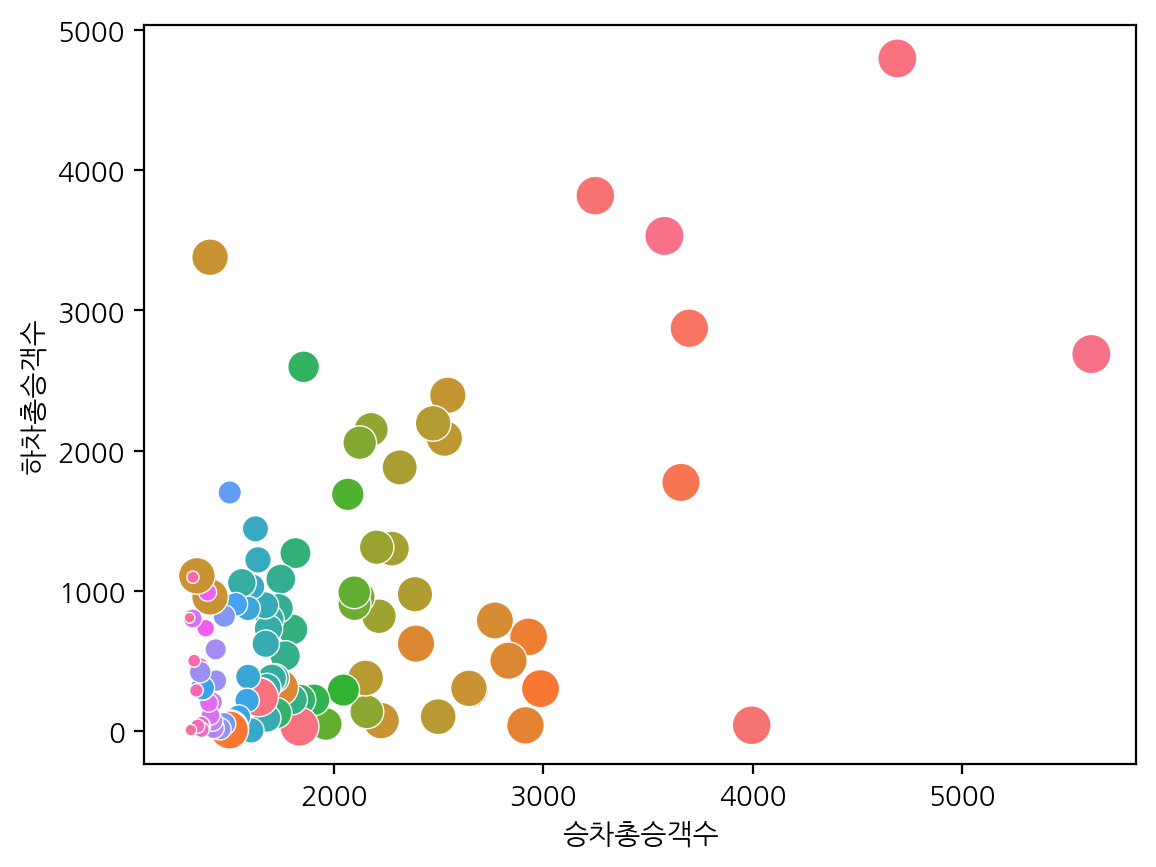

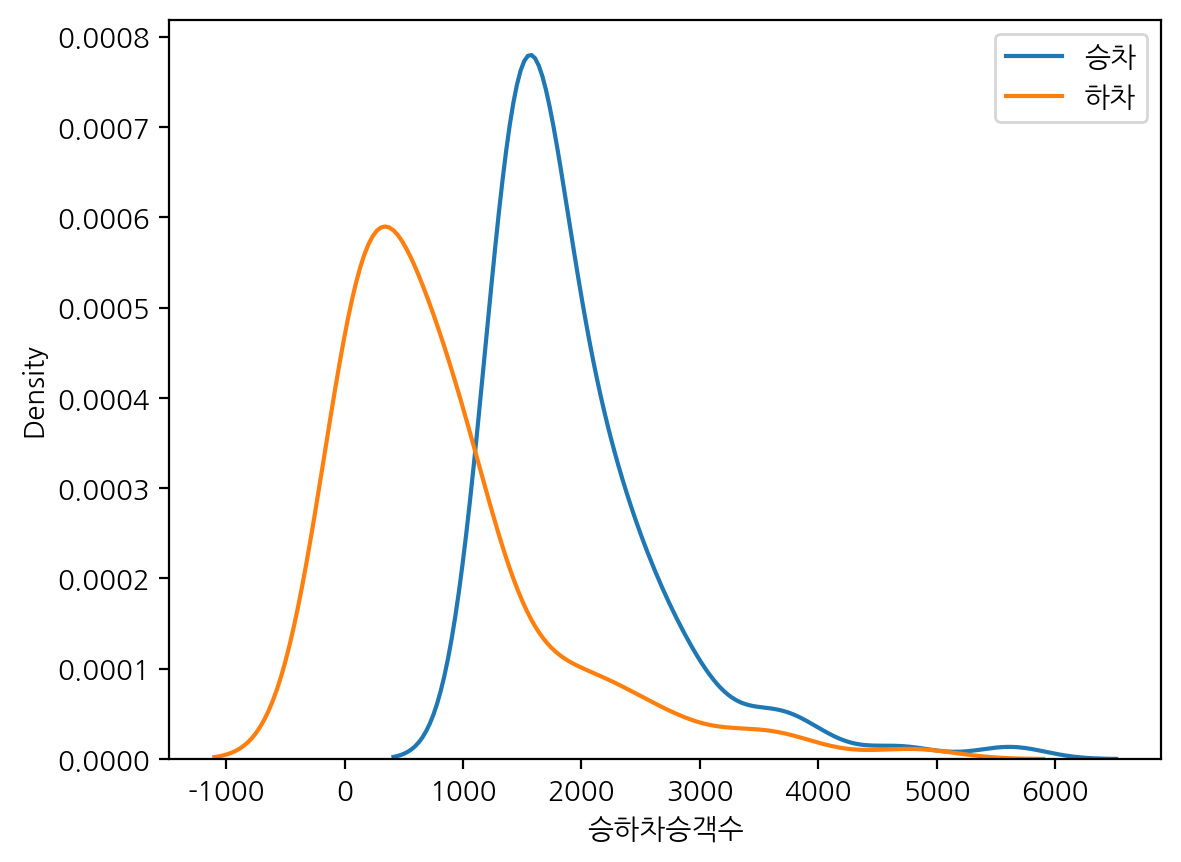

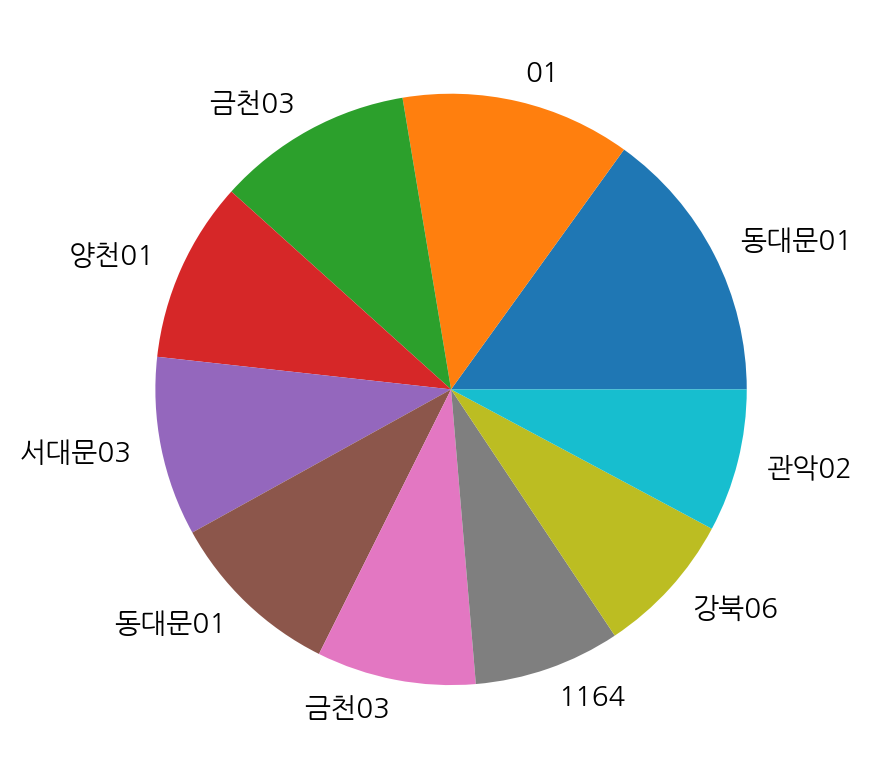

In [4]:
with open("../large-datasets/서울시 버스노선별 정류장별 승하차 인원 정보.csv", encoding="cp949") as f:
    # data = csv.reader(f)
    data = pd.read_csv(f)
    
    
trimmed = data.drop(columns=['사용일자','노선명','버스정류장ARS번호']).sort_values(by='승차총승객수')[::-1].drop_duplicates(subset=['표준버스정류장ID']).head(100) #.loc[(trimmed["승차총승객수"] < 1000)]
print(trimmed)

anothertrim = trimmed#.head(100)
twenties = trimmed.head(20)

blue_buses = anothertrim.loc[(anothertrim["노선번호"].str.len() <= 3)]
four_digit_buses = anothertrim.loc[(anothertrim["노선번호"].str.len() == 4) & (anothertrim['노선번호'].str.isdecimal() == True)]
town_buses = anothertrim.loc[(anothertrim["노선번호"].str.len() >= 4) & (anothertrim['노선번호'].str.isalnum() == True)]
# 한글 없애기??
sns.scatterplot(anothertrim, x='승차총승객수',y='하차총승객수', size='노선번호',hue='노선번호', sizes=(15,200), legend=False)
# plt.gca().get_yaxis().set_visible(False)

# pos = plt.ax.get_position()
# plt.ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
# plt.ax.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))

plt.show()


sns.kdeplot(data=anothertrim['승차총승객수'],label='승차')
# plt.bar(twenties['노선번호'],twenties['승차총승객수'], width=.5)
# for i, val in enumerate(twenties['승차총승객수'].values):
#     plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})
sns.kdeplot(data=anothertrim['하차총승객수'],label='하차')
plt.xlabel("승하차승객수")
plt.legend()
plt.show()

# for bus_stop in [i.split('(')[0] for i in trimmed['역명']:
plt.pie(trimmed.head(10)['승차총승객수'], labels=trimmed.head(10)['노선번호'])
plt.show()

## vscode test

# 생활이동 자치구(작은거)